In [58]:
2+2

4

In [59]:
! rm -f international-airline-passengers.csv
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/airline/international-airline-passengers.csv -O international-airline-passengers.csv

--2018-02-09 03:40:16--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/airline/international-airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2334 (2.3K) [text/plain]
Saving to: ‘international-airline-passengers.csv’

100%[======================================>] 2,334       --.-K/s   in 0s      

2018-02-09 03:40:16 (17.1 MB/s) - ‘international-airline-passengers.csv’ saved [2334/2334]



In [60]:
#LSTM 
# Prediction as a regression problem
# given the number of passengers (in units of thousands) this month, what is the number of passengers next month.

In [61]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


# fix random seed for reproducibility
numpy.random.seed(7)

In [62]:
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

from sklearn.preprocessing import MinMaxScaler
    
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [63]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [64]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [65]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back))) # Hidden layer.. 4 blocks/neurons lstm type
model.add(Dense(1)) # makes one prediciton hence dense layer of size 1
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0414
Epoch 2/100
0s - loss: 0.0202
Epoch 3/100
0s - loss: 0.0145
Epoch 4/100
0s - loss: 0.0131
Epoch 5/100
0s - loss: 0.0121
Epoch 6/100
0s - loss: 0.0111
Epoch 7/100
0s - loss: 0.0102
Epoch 8/100
0s - loss: 0.0093
Epoch 9/100
0s - loss: 0.0081
Epoch 10/100
0s - loss: 0.0071
Epoch 11/100
0s - loss: 0.0062
Epoch 12/100
0s - loss: 0.0053
Epoch 13/100
0s - loss: 0.0045
Epoch 14/100
0s - loss: 0.0038
Epoch 15/100
0s - loss: 0.0033
Epoch 16/100
0s - loss: 0.0029
Epoch 17/100
0s - loss: 0.0026
Epoch 18/100
0s - loss: 0.0024
Epoch 19/100
0s - loss: 0.0022
Epoch 20/100
0s - loss: 0.0022
Epoch 21/100
0s - loss: 0.0021
Epoch 22/100
0s - loss: 0.0021
Epoch 23/100
0s - loss: 0.0021
Epoch 24/100
0s - loss: 0.0021
Epoch 25/100
0s - loss: 0.0020
Epoch 26/100
0s - loss: 0.0021
Epoch 27/100
0s - loss: 0.0020
Epoch 28/100
0s - loss: 0.0020
Epoch 29/100
0s - loss: 0.0020
Epoch 30/100
0s - loss: 0.0021
Epoch 31/100
0s - loss: 0.0020
Epoch 32/100
0s - loss: 0.0020
Epoch 33/100
0s -

In [66]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [67]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.93 RMSE
Test Score: 47.53 RMSE


In [68]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

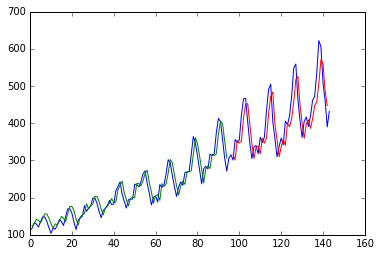

In [69]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [70]:
## graph says good but the errors are large.. esp on the training side..
#Train Score: 22.93 RMSE # 23 k passengers error
#Test Score: 47.53 RMSE # 47 k passengers error

In [71]:
# lstm for regression with a window

In [72]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [73]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0517
Epoch 2/100
0s - loss: 0.0243
Epoch 3/100
0s - loss: 0.0160
Epoch 4/100
0s - loss: 0.0137
Epoch 5/100
0s - loss: 0.0123
Epoch 6/100
0s - loss: 0.0110
Epoch 7/100
0s - loss: 0.0099
Epoch 8/100
0s - loss: 0.0087
Epoch 9/100
0s - loss: 0.0077
Epoch 10/100
0s - loss: 0.0068
Epoch 11/100
0s - loss: 0.0059
Epoch 12/100
0s - loss: 0.0054
Epoch 13/100
0s - loss: 0.0049
Epoch 14/100
0s - loss: 0.0045
Epoch 15/100
0s - loss: 0.0042
Epoch 16/100
0s - loss: 0.0040
Epoch 17/100
0s - loss: 0.0039
Epoch 18/100
0s - loss: 0.0039
Epoch 19/100
0s - loss: 0.0037
Epoch 20/100
0s - loss: 0.0037
Epoch 21/100
0s - loss: 0.0036
Epoch 22/100
0s - loss: 0.0036
Epoch 23/100
0s - loss: 0.0036
Epoch 24/100
0s - loss: 0.0036
Epoch 25/100
0s - loss: 0.0035
Epoch 26/100
0s - loss: 0.0035
Epoch 27/100
0s - loss: 0.0033
Epoch 28/100
0s - loss: 0.0033
Epoch 29/100
0s - loss: 0.0033
Epoch 30/100
0s - loss: 0.0034
Epoch 31/100
0s - loss: 0.0032
Epoch 32/100
0s - loss: 0.0033
Epoch 33/100
0s -

In [74]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

Train Score: 23.78 RMSE
Test Score: 60.24 RMSE


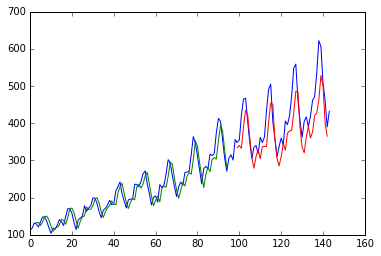

In [75]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [76]:
# network tuning required..?

In [77]:

#LSTM regression with Time steps:
# chage the features to 1, and the stime steps is the size of array
#Time steps provides another way to phrase our time series problem
# like force applied on a membrane before it finally breaks down.. and the break down is the event to be predicted


# LSTM for international airline passengers problem with time step regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)

# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python',
skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')

#LSTM sensitive to size /magnitudes of input
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [78]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


Epoch 1/100
1s - loss: 0.0285
Epoch 2/100
0s - loss: 0.0117
Epoch 3/100
0s - loss: 0.0097
Epoch 4/100
0s - loss: 0.0086
Epoch 5/100
0s - loss: 0.0074
Epoch 6/100
0s - loss: 0.0065
Epoch 7/100
0s - loss: 0.0058
Epoch 8/100
0s - loss: 0.0053
Epoch 9/100
0s - loss: 0.0045
Epoch 10/100
0s - loss: 0.0044
Epoch 11/100
0s - loss: 0.0041
Epoch 12/100
0s - loss: 0.0041
Epoch 13/100
0s - loss: 0.0040
Epoch 14/100
0s - loss: 0.0039
Epoch 15/100
0s - loss: 0.0039
Epoch 16/100
0s - loss: 0.0039
Epoch 17/100
0s - loss: 0.0038
Epoch 18/100
0s - loss: 0.0039
Epoch 19/100
0s - loss: 0.0038
Epoch 20/100
0s - loss: 0.0038
Epoch 21/100
0s - loss: 0.0038
Epoch 22/100
0s - loss: 0.0038
Epoch 23/100
0s - loss: 0.0037
Epoch 24/100
0s - loss: 0.0038
Epoch 25/100
0s - loss: 0.0037
Epoch 26/100
0s - loss: 0.0038
Epoch 27/100
0s - loss: 0.0037
Epoch 28/100
0s - loss: 0.0038
Epoch 29/100
0s - loss: 0.0037
Epoch 30/100
0s - loss: 0.0036
Epoch 31/100
0s - loss: 0.0037
Epoch 32/100
0s - loss: 0.0036
Epoch 33/100
0s -

Train Score: 23.69 RMSE
Test Score: 58.95 RMSE


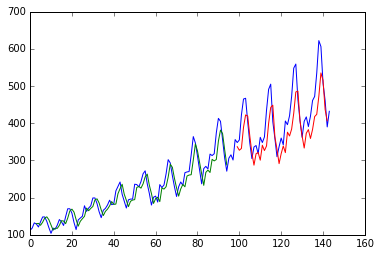

In [79]:

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [80]:
# LSTM With Memory Between Batches

usually the state within the network is reset after each training batch when fotting the model, as well as each call to model.predict() or model.evaluate().  
We can gain better/finer control over when the internal state of the LSTM network is cleared in Keras by making the LSTM layer  stateful.  
Obviously training data should not be shuffled  
requires explicit resetting of the network state after each exposure to the training data (epoch) by calls to model.reset states()

In [83]:
# create and fit the LSTM network


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))


batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [84]:
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

Epoch 1/1
1s - loss: 0.0110
Epoch 1/1
0s - loss: 0.0370
Epoch 1/1
0s - loss: 0.0189
Epoch 1/1
0s - loss: 0.0141
Epoch 1/1
0s - loss: 0.0103
Epoch 1/1
0s - loss: 0.0076
Epoch 1/1
0s - loss: 0.0062
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0056
Epoch 1/1
0s - loss: 0.0056
Epoch 1/1
0s - loss: 0.0056
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0054
Epoch 1/1
0s - loss: 0.0054
Epoch 1/1
0s - loss: 0.0054
Epoch 1/1
0s - loss: 0.0053
Epoch 1/1
0s - loss: 0.0053
Epoch 1/1
0s - loss: 0.0053
Epoch 1/1
0s - loss: 0.0052
Epoch 1/1
0s - loss: 0.0052
Epoch 1/1
0s - loss: 0.0052
Epoch 1/1
0s - loss: 0.0051
Epoch 1/1
0s - loss: 0.0051
Epoch 1/1
0s - loss: 0.0051
Epoch 1/1
0s - loss: 0.0050
Epoch 1/1
0s - loss: 0.0050
Epoch 1/1
0s - loss: 0.0050
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss:

In [85]:
# LSTM for international airline passengers problem with memory
 

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])




Epoch 1/1
1s - loss: 0.0053
Epoch 1/1
0s - loss: 0.0083
Epoch 1/1
0s - loss: 0.0063
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0052
Epoch 1/1
0s - loss: 0.0051
Epoch 1/1
0s - loss: 0.0051
Epoch 1/1
0s - loss: 0.0050
Epoch 1/1
0s - loss: 0.0050
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0037
Epoch 1/1
0s - loss: 0.0037
Epoch 1/1
0s - loss: 0.0037
Epoch 1/1
0s - loss:

In [86]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.05 RMSE
Test Score: 0.11 RMSE


In [87]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

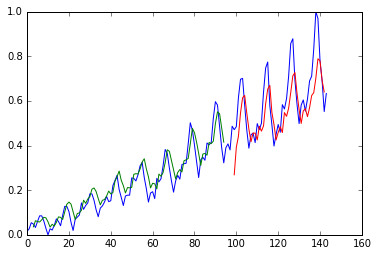

In [88]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [89]:
# LSTM for international airline passengers problem with memory
 
# Repeat with higher number of iterations...

# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))


# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(300):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

Epoch 1/1
1s - loss: 0.0199
Epoch 1/1
0s - loss: 0.0217
Epoch 1/1
0s - loss: 0.0161
Epoch 1/1
0s - loss: 0.0132
Epoch 1/1
0s - loss: 0.0110
Epoch 1/1
0s - loss: 0.0093
Epoch 1/1
0s - loss: 0.0080
Epoch 1/1
0s - loss: 0.0070
Epoch 1/1
0s - loss: 0.0063
Epoch 1/1
0s - loss: 0.0059
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0053
Epoch 1/1
0s - loss: 0.0052
Epoch 1/1
0s - loss: 0.0050
Epoch 1/1
0s - loss: 0.0049
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0048
Epoch 1/1
0s - loss: 0.0047
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0046
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0045
Epoch 1/1
0s - loss: 0.0044
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0043
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0042
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0041
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0040
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0039
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss: 0.0038
Epoch 1/1
0s - loss:

In [90]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.04 RMSE
Test Score: 0.11 RMSE


In [91]:
#same RMSE scores..

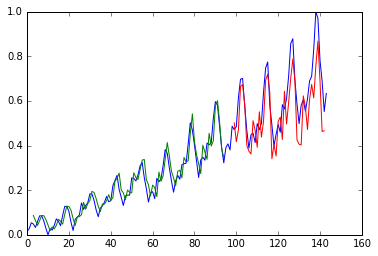

In [92]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [93]:
# but the graph gets worse.. :D

In [94]:
#Stacking LSTM
# similar to stacking dense/conv layers..

#an addition to the configuration that is required is that an LSTM layer prior to each subsequent LSTM layer mustreturn the sequence.
#set the return sequences parameter on the layer to True.


# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))
# create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True,
return_sequences=True))
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')


In [95]:
for i in range(100):
    model.fit(trainX, trainY, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
    model.reset_states()

Epoch 1/1
3s - loss: 0.0060
Epoch 1/1
0s - loss: 0.0223
Epoch 1/1
0s - loss: 0.0163
Epoch 1/1
0s - loss: 0.0123
Epoch 1/1
0s - loss: 0.0091
Epoch 1/1
0s - loss: 0.0073
Epoch 1/1
0s - loss: 0.0066
Epoch 1/1
0s - loss: 0.0063
Epoch 1/1
0s - loss: 0.0061
Epoch 1/1
0s - loss: 0.0060
Epoch 1/1
0s - loss: 0.0059
Epoch 1/1
0s - loss: 0.0059
Epoch 1/1
0s - loss: 0.0058
Epoch 1/1
0s - loss: 0.0058
Epoch 1/1
0s - loss: 0.0058
Epoch 1/1
0s - loss: 0.0058
Epoch 1/1
0s - loss: 0.0058
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0057
Epoch 1/1
0s - loss: 0.0056
Epoch 1/1
0s - loss: 0.0056
Epoch 1/1
0s - loss: 0.0056
Epoch 1/1
0s - loss: 0.0056
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0055
Epoch 1/1
0s - loss: 0.0054
Epoch 1/1
0s - loss:

In [96]:
# make predictions
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.04 RMSE
Test Score: 0.12 RMSE


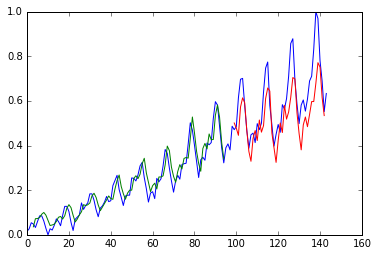

In [97]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()